# Disaster tweets EDA

In [69]:
import re

import numpy as np
import pandas as pd
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

pd.set_option('display.max_rows', 50)
sns.set_style('darkgrid')
sns.set_palette('colorblind')

<IPython.core.display.Javascript object>

In [ ]:
!pip install nb-black --quiet
%load_ext nb_black

## Import dataset

In [8]:
df_train = pd.read_csv('./data/train.csv')

<IPython.core.display.Javascript object>

In [18]:
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


<IPython.core.display.Javascript object>

## Missing values

TypeError: bar_label() missing 1 required positional argument: 'container'

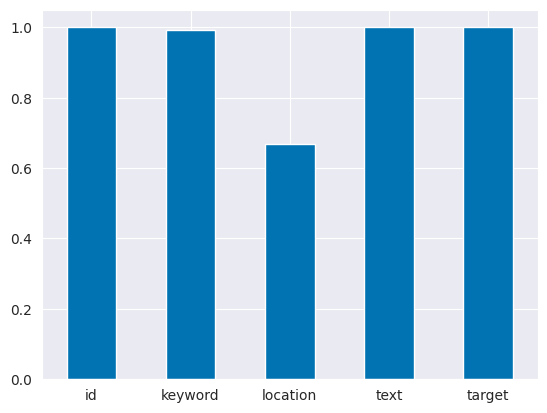

<IPython.core.display.Javascript object>

In [68]:
ax = (1 - df_train.isna().sum() / df_train.shape[0]).plot(kind='bar', rot=0)

plt.bar_label([val for val in ax.containers[0].datavalues])
plt.show()

<Axes: >

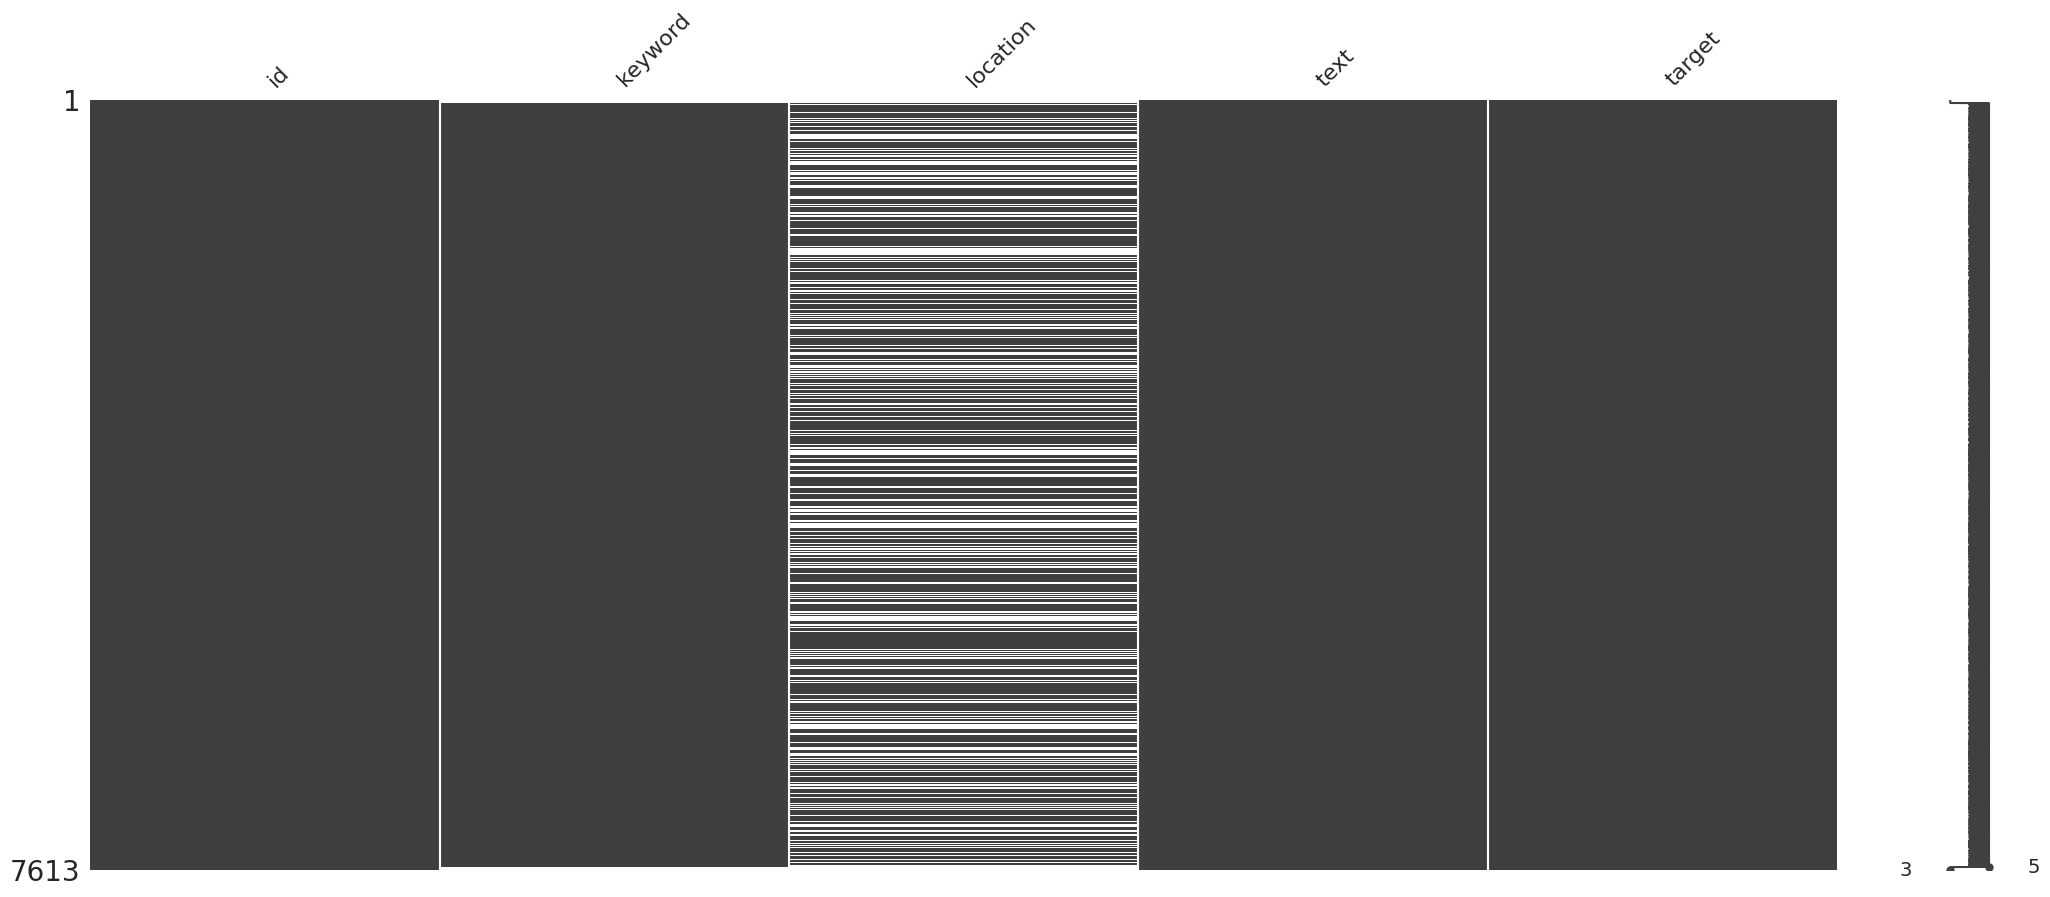

<IPython.core.display.Javascript object>

In [41]:
msno.matrix(df_train)

## Feature engineering

Extract hastag value if present in the tweet

In [143]:
def get_hastags(text_series: pd.Series) -> pd.Series:
    """Extract the hasgtag value in each text row."""
    hashtags = text_series.str.extract(r'(#[a-zA-Z]+)', expand=False)
    hashtags = hashtags.str.split('#', expand=True)[1]
    return hashtags

df_train['hashtag'] = get_hastags(df_train['text'])

<IPython.core.display.Javascript object>

In [146]:
df_train['text'].str.extract(r'(#[a-zA-Z]+)', expand=False)

0       #earthquake
1               NaN
2               NaN
3        #wildfires
4           #Alaska
           ...     
7608            NaN
7609            NaN
7610            NaN
7611            NaN
7612            NaN
Name: text, Length: 7613, dtype: object

<IPython.core.display.Javascript object>

In [144]:
df_train['hashtag'].isna().sum() / df_train.shape[0]

0.7760409825298831

<IPython.core.display.Javascript object>

Extract country, town and continent (when applicable)

## Target analysis

In [126]:
df_train[~df_train['keyword'].isna()]

,id,keyword,location,text,target,hashtag
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,NaN
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,metal
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,AFRICANBAZE
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,NaN
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,NaN
...,...,...,...,...,...,...
7578,10830,wrecked,NaN,@jt_ruff23 @cameronhacker and I wrecked you both,0,NaN
7579,10831,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,0,NaN
7580,10832,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words tha...,0,FX
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,0,NaN


<IPython.core.display.Javascript object>